# Installation

Currently works with envoronment set to "Always use latest environment". New notebook with a pinned environment is coming soon and will be linked here.

Session options:
 * Accelerator: GPU T4 x2
 * Language: Python
 * Persistence: File Only
 * Environment: Always use latest environment


In [ ]:
%%time
update = False

import os
import stat
!rm -rf /kaggle/working/venv
home_dir = '/kaggle/working'
python = '/kaggle/working/venv/bin/python'
pip = '/kaggle/working/venv/bin/pip'

def find_bin_folders(folder_path):
    bin_folders = []
    for root, dirs, files in os.walk(folder_path):
        for dir_name in dirs:
            if dir_name == 'bin':
                bin_folders.append(os.path.join(root, dir_name)) 
    return bin_folders

def installLibraries(home_dir, python, pip):
  %cd {home_dir}
  !{pip} install torch torchvision torchaudio --index-url https://download.pytorch.org/whl/cu121
  !{pip} install tensorflow[and-cuda]
  # TODO: download req.txt  
  !wget https://q4j3.c11.e2-5.dev/downloads/req.txt
  !{pip} install -r /kaggle/working/req.txt

!pip install virtualenv

if not os.path.exists(f'{home_dir}/venv'):
    print('installing venv')
    os.chdir(home_dir)
    get_ipython().system(f'cd {home_dir}')
    
    get_ipython().system('virtualenv venv -p $(which python3.10)')
    installLibraries(home_dir, python, pip)
else:
    bin_folders = find_bin_folders('/kaggle/working/venv')
    if bin_folders:
      print("Found 'bin' folders:")
      for bin_folder in bin_folders:
        print(bin_folder)
        for filename in os.listdir(bin_folder):
            file_path = os.path.join(bin_folder, filename)
            if os.path.isfile(file_path):
                current_permissions = os.stat(file_path).st_mode
                 # Add execute permissions for the user, group, and others
                os.chmod(file_path, current_permissions | stat.S_IXUSR | stat.S_IXGRP | stat.S_IXOTH)

if not os.path.exists(f'{home_dir}/venv/bin/python3.10'):
    get_ipython().system('cp /opt/conda/bin/python3.10 /kaggle/working/venv/bin/')
!ln -s /kaggle/working/venv/bin/python3.10 /kaggle/working/venv/bin/python
!ln -s /kaggle/working/venv/bin/python3.10 /kaggle/working/venv/bin/python3

%cd /kaggle/working
!git clone https://github.com/comfyanonymous/ComfyUI.git
%cd ComfyUI
!git checkout 7fc3ccdcc2fb1f20c4b7dd4aca374db952fd66df

#if update:
#    get_ipython().system('git pull')
#else:
#    get_ipython().system('git checkout 9acfe4df41b3b0ad8c600fc2d70a3af5c82cf4a4')
!{pip} install xformers!=0.0.18 insightface onnxruntime-gpu diffusers ultralytics -r requirements.txt

!mkdir /tmp/models
!mkdir /tmp/models/checkpoints
!mkdir /tmp/models/clip
!mkdir /tmp/models/vae
!mkdir /tmp/models/unet

# Remove the following two lines to keep models in permanent storage
!rm -rf /kaggle/working/ComfyUI/models/checkpoints
!rm -rf /kaggle/working/ComfyUI/models/clip
!rm -rf /kaggle/working/ComfyUI/models/vae
!rm -rf /kaggle/working/ComfyUI/models/unet

!ln -s /tmp/models/checkpoints /kaggle/working/ComfyUI/models/checkpoints
!ln -s /tmp/models/clip /kaggle/working/ComfyUI/models/clip
!ln -s /tmp/models/vae /kaggle/working/ComfyUI/models/vae
!ln -s /tmp/models/unet /kaggle/working/ComfyUI/models/unet

checkpoints =  '/kaggle/working/ComfyUI/models/checkpoints'
link_path = checkpoints + '/temp-models'
temp_models = '/kaggle/temp/temp-models'

!mkdir /kaggle/temp
!mkdir $temp_models

if not os.path.exists(link_path):
    get_ipython().system(f'ln -s {temp_models} {checkpoints}')

# Install the node manager
update_manager = True
%cd /kaggle/working/ComfyUI/custom_nodes
!git clone https://github.com/ltdrdata/ComfyUI-Manager.git
%cd ComfyUI-Manager

if update_manager:
    get_ipython().system('git pull')
#!{pip} install -r requirements.txt

# Pinggy script
!wget https://raw.githubusercontent.com/wandaweb/jupyter-webui-tunneling/main/pinggy.py -O /kaggle/working/pinggy.py
    
# Second GPU offload
%cd /kaggle/working/ComfyUI/custom_nodes
!wget https://gist.githubusercontent.com/city96/30743dfdfe129b331b5676a79c3a8a39/raw/ecb4f6f5202c20ea723186c93da308212ba04cfb/ComfyBootlegOffload.py

#!mamba install -y openssh
#!{pip} install torchsde

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.3/4.3 MB 38.0 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 469.0/469.0 kB 22.9 MB/s eta 0:00:00
installing venv
created virtual environment CPython3.10.12.final.0-64 in 828ms
  creator CPython3Posix(dest=/kaggle/working/venv, clear=False, no_vcs_ignore=False, global=False)
  seeder FromAppData(download=False, pip=bundle, setuptools=bundle, wheel=bundle, via=copy, app_data_dir=/root/.local/share/virtualenv)
    added seed packages: pip==25.0.1, setuptools==75.8.0, wheel==0.45.1
  activators BashActivator,CShellActivator,FishActivator,NushellActivator,PowerShellActivator,PythonActivator
/kaggle/working
Error in sitecustomize; set PYTHONVERBOSE for traceback:
ModuleNotFoundError: No module named 'log'
Looking in indexes: https://download.pytorch.org/whl/cu121
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 780.4/780.4 MB 45.1 MB/s eta 0:00:00:00:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.3/7.3 MB 2.5 MB/s e

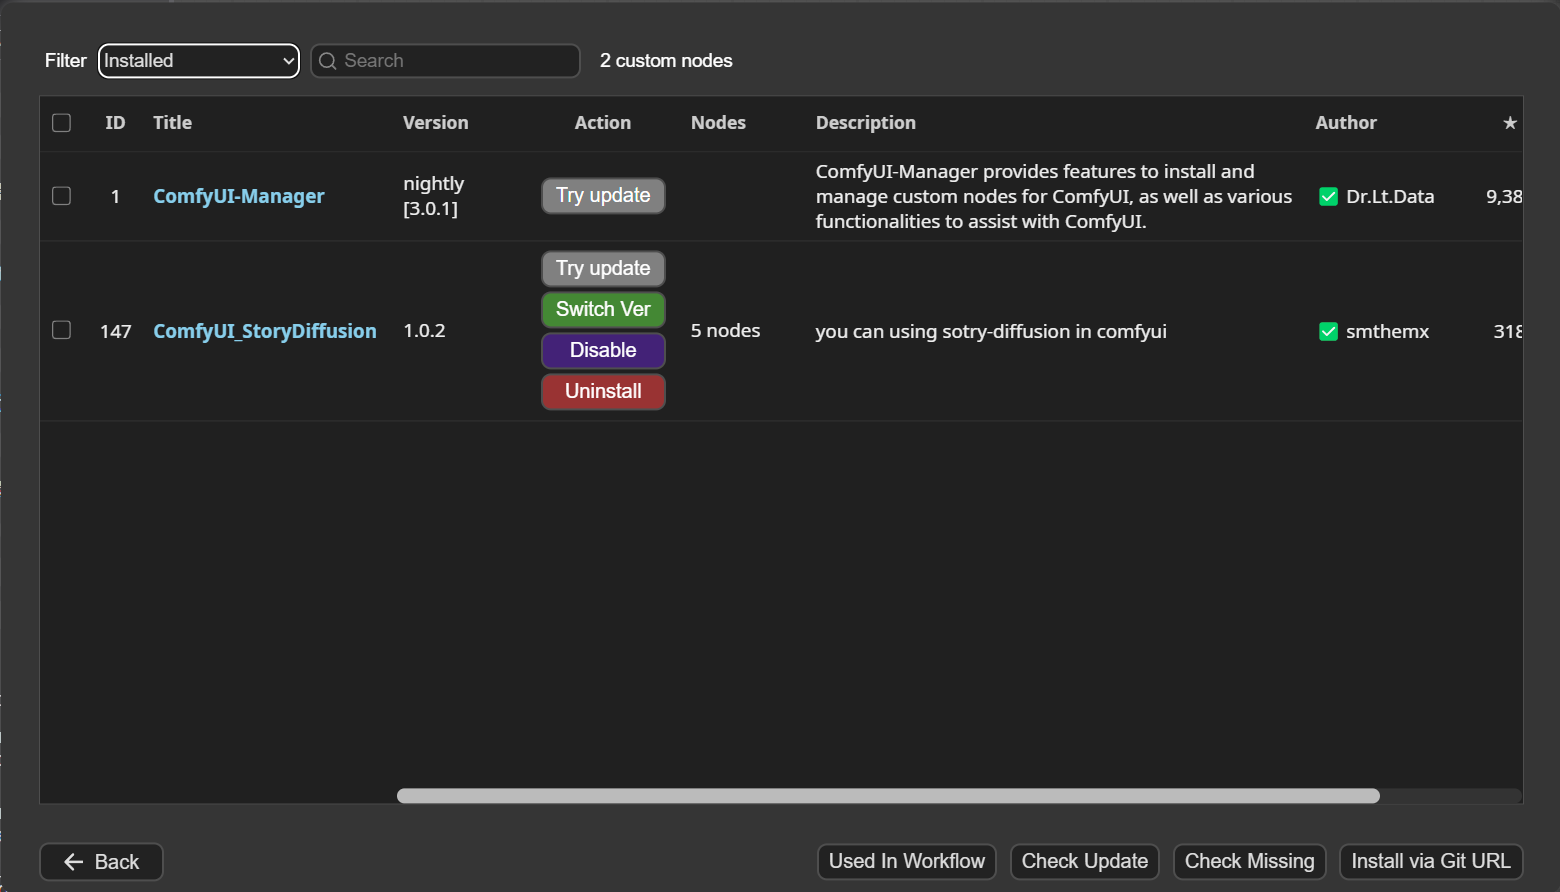

--- 
# WebUI

## Start the WebUI with Pinggy
* Wait for the GUI to start.  
* Click the link that ends with .pinggy.link 😁
* If generation is still running after the link expires in an hour, wait for the generation to complete and restart the WebUI code block to get a new link

In [10]:
# Starting the Web UI with pinggy

%cd /kaggle/working/ComfyUI
!python /kaggle/working/pinggy.py --command='/kaggle/working/venv/bin/python /kaggle/working/ComfyUI/main.py' --port=8188

/kaggle/working/ComfyUI
8188
/kaggle/working/venv/bin/python /kaggle/working/ComfyUI/main.py
Port 8188 is free.
/kaggle/working/venv/bin/python /kaggle/working/ComfyUI/main.py
waiting for output
Error in sitecustomize; set PYTHONVERBOSE for traceback:
ModuleNotFoundError: No module named 'log'
[START] Security scan
Error in sitecustomize; set PYTHONVERBOSE for traceback:
ModuleNotFoundError: No module named 'log'
[DONE] Security scan
## ComfyUI-Manager: installing dependencies done.
** ComfyUI startup time: 2025-03-26 09:26:16.469
** Platform: Linux
** Python version: 3.10.12 (main, Nov  6 2024, 20:22:13) [GCC 11.4.0]
** Python executable: /kaggle/working/venv/bin/python
** ComfyUI Path: /kaggle/working/ComfyUI
** ComfyUI Base Folder Path: /kaggle/working/ComfyUI
** User directory: /kaggle/working/ComfyUI/user
** ComfyUI-Manager config path: /kaggle/working/ComfyUI/user/default/ComfyUI-Manager/config.ini
** Log path: /kaggle/working/ComfyUI/user/comfyui.log
Error in sitecustomize; set 

## Start the WebUI with Zrok

### Install Zrok

In [ ]:
# Install Zrok (only needs to run once)

!mkdir /kaggle/working/zrok
%cd /kaggle/working/zrok
!wget https://github.com/openziti/zrok/releases/download/v0.4.23/zrok_0.4.23_linux_amd64.tar.gz
!tar -xvf ./zrok*.gz 
!chmod a+x /kaggle/working/zrok/zrok 

### Create a Zrok account
Enter your email address in the email variable

In [ ]:
email = '####@gmail.com' # replace with your email

# --------------

cmd = '/kaggle/working/zrok/zrok invite'
log = '/kaggle/working/zrok/log.txt'

!pip install pexpect
!touch $log

import pexpect
import time
child = pexpect.spawn('bash')
child.sendline(f'{cmd} | tee {log}')
child.expect('enter and confirm your email address...')
time.sleep(1); child.sendline(email); time.sleep(1); child.send(chr(9)); time.sleep(1)
child.sendline(email); time.sleep(1); child.send('\n'); time.sleep(1); child.send(chr(9))
time.sleep(1); child.send('\r\n'); time.sleep(2); child.close()
!cat $log
!rm $log

### Enable Zrok 
Paste your Zrok token in the token variable

In [ ]:
# Enable Zrok (needs to run once per instance)
# Paste your Zrok token in the token variable

token = ""
!chmod a+x /kaggle/working/zrok/zrok 
!/kaggle/working/zrok/zrok enable $token

### Start the WebUI with Zrok

In [ ]:
# Start the WebUI with Zrok
%cd /kaggle/working/ComfyUI
command = 'python /kaggle/working/ComfyUI/main.py'
port = '8188'
# ------------------------

!chmod a+x /kaggle/working/zrok/zrok 
cmd = f'{command} & /kaggle/working/zrok/zrok share public http://localhost:{port} --headless'
get_ipython().system(cmd)

---
# Model Management

## Install a model

Copy the model URL to the model_url field. Make sure the model can be accessed publicly, without being signed into a website.

In [ ]:
# Install a model in permanent storage
# Make sure Persistence is set to "Files only" or "Variables and Files"
model_url = 'https://civitai.com/api/download/models/782002'
model_name = 'JuggernautXL.safetensors'

%cd $checkpoints
get_ipython().system(f'wget -O "{model_name}" "{model_url}"')

In [ ]:
# Install a LoRA in permanent storage
model_url = 'https://civitai.com/api/download/models/137124?type=Model&format=SafeTensor'
model_name = 'DreamArt.safetensors'

%cd /kaggle/working/ComfyUI/models/loras
get_ipython().system(f'wget -O "{model_name}" "{model_url}"')

In [ ]:
# Install a model in temporary storage
#model_url = 'https://civitai.com/api/download/models/160191?type=Model&format=SafeTensor&size=full&fp=fp16'
#model_name = 'YamersRealism.safetensors'
model_url = 'https://civitai.com/api/download/models/456751'
model_name = 'HelloWorld-XL.safetensors' 

%cd $temp_models
get_ipython().system(f'wget -O "{model_name}" "{model_url}"')

## Download a model for a custom node

In [ ]:
model_folder = '/kaggle/working/ComfyUI/custom_nodes/my_node/models'
model_url = ''
model_name = 'model.safetensors'

%cd $model_folder
get_ipython().system(f'wget -O "{model_name}" "{model_url}"')

---
# File Browser

## Install FileBrowser

In [ ]:
%cd /kaggle
!wget https://github.com/filebrowser/filebrowser/releases/download/v2.27.0/linux-amd64-filebrowser.tar.gz
!tar xvfz linux-amd64-filebrowser.tar.gz
!chmod a+x /kaggle/filebrowser
!/kaggle/filebrowser config init 
!/kaggle/filebrowser config set --auth.method=noauth > /dev/null
!/kaggle/filebrowser config set --branding.theme=dark > /dev/null
!/kaggle/filebrowser users add admin admin 
!/kaggle/filebrowser config export "/kaggle/config.json"

## Run FileBrowser

In [ ]:
%cd /kaggle
!chmod a+x /kaggle/filebrowser

!python /kaggle/working/pinggy.py --command='/kaggle/filebrowser -c "/kaggle/working/config.json"' --port=8080

# 
# Delete a model

In [ ]:
# List permanent models
!ls -la $checkpoints

# Delete a model
model_to_delete = '/kaggle/working/ComfyUI/models/checkpoints/model.safetensors'
!rm $model_to_delete

In [ ]:
# Check the size of a model
!du -sh /kaggle/working/ComfyUI/models/loras/harrlogos.safetensors

# 
# Delete everything in the working folder

In [ ]:
# Delete the working folder
!rm -rf /kaggle/working/*